K Nearest Neighbours to predict weather the new customer will buy the car or not based on the learned correlation between the age and salary values and optimize the sales targeting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
ans = classifier.predict(X_test[[0]]) #predict yes/no
print(int(ans))

0


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


acc = accuracy_score(y_test, y_pred)
print(acc)

[[64  4]
 [ 3 29]]
0.93


Text(0, 0.5, 'Error')

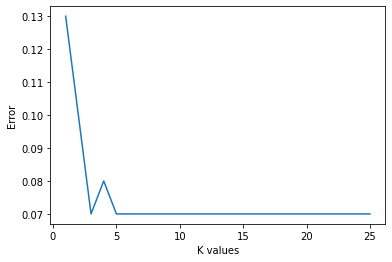

In [ ]:
from sklearn import metrics

k_range=range(1,26)
error1={}
errorlist=[]
for k in k_range:
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  error1[k]=1-metrics.accuracy_score(y_test,y_pred)
  errorlist.append(1-metrics.accuracy_score(y_test,y_pred))
import matplotlib.pyplot as plt
plt.plot(k_range, errorlist)
plt.xlabel("K values")
plt.ylabel("Error")